Ana Isabel Urdapilleta Martin - u172960

Júlia Ruiz Valero - u172955


#**Information Retrieval and Web Analytics: FINAL PROJECT**
## PART 1: TEXT PROCESSING


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# if you do not have 'nltk', the following command should work "python -m pip install nltk"
import nltk
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from collections import defaultdict
from array import array
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import math
import numpy as np
import collections
from numpy import linalg as la
import json
import re
from nltk.stem import WordNetLemmatizer

In [ ]:
docs_path = 'drive/My Drive/tw_hurricane_data.json' # CHANGE according to the path
with open(docs_path) as fp:
    lines = fp.readlines()

lines = [l.strip().replace(' +', ' ') for l in lines]


In [ ]:
print("Total number of docs in the corpus: {}".format(len(lines)))

Total number of docs in the corpus: 4000


## Reduce the information to keep

We create a function called reduce to keep the information that we are asked: Id | Tweet | Username | Date | Hashtags | Likes | Retweets | Url
The function returns the reduced tweet as a dictionary and the text of the tweet as a string. This last one will we the one that we will preprocess later on.

In [ ]:
def reduce(tweet):
  reduced_tweet = {}
  tweet = json.loads(tweet)
  reduced_tweet['Id'] = tweet['id']
  reduced_tweet['Tweet'] = tweet['full_text']
  reduced_tweet['Username'] = tweet['user']['screen_name']
  reduced_tweet['Date'] = tweet['created_at']
  reduced_tweet['Hashtags'] = [hashtag['text'] for hashtag in tweet['entities']['hashtags']]
  reduced_tweet['Likes'] = tweet['favorite_count']
  reduced_tweet['Retweets'] = tweet['retweet_count']
  reduced_tweet['Url'] = 'https://twitter.com/_/status/'+str(tweet['id'])
  return reduced_tweet,  str(reduced_tweet['Tweet'])

### Preprocess the text of the tweets
We create a function called build_terms that preprocesses the text as follows:
- Reduce tweet to get the string
- Lowercase
- Remove URLs
- Remove mentions
- Remove punctuation
- Split the text
- Remove newlines
- Remove hashtag symbols
- Remove emojis
- Remove stop words
- Stem
- Lematize
- Remove empty strings

In [ ]:
def build_terms(line):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)

    
    
    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words("english"))
    
    text = line.lower() # Transform in lowercase
    
    text = re.sub(r'http\S+', ' ', text) # remove urls
    text = re.sub(r'@\S+',' ', text) #remove mentions
    text = re.sub(r'[^\w\s]', ' ', text) #remove punctuation
    text =  text.split() # Tokenize the text to get a list of terms
    text = [re.sub(r'\\n', '', x) for x in text]  # remove newline signs \\n
    text = [x.replace('#', '') for x in text] # remove # symbol
    text = [re.sub(emoji_pattern,'',x) for x in text] # remove emojis
    
    text = [x for x in text if x not in stop_words]  # delete the stopwords
    text =[stemmer.stem(x) for x in text] # perform stemming
    text =[lemmatizer.lemmatize(x) for x in text]
    empty = ['', ' ']
    text = [x for x in text if x not in empty] #remove empty strings '', ' '
    
    return text

In [ ]:
preprocessed_lines = []
for i in range(len(lines)):
  tweet, text = reduce(lines[i])  # reduce tweet info to what we are asked
  text = build_terms(text)
  tweet['Tweet'] = text
  preprocessed_lines.append(tweet)

Following we print all the fields of the second tweet to show how it works:

In [ ]:
# We print the Tweet | Username | Date | Hashtags | Likes | Retweets | Url of the first preprocessed tweet
print(preprocessed_lines[1]['Tweet'])
print(preprocessed_lines[1]['Username'])
print(preprocessed_lines[1]['Date'])
print(preprocessed_lines[1]['Hashtags'])
print(preprocessed_lines[1]['Likes'])
print(preprocessed_lines[1]['Retweets'])
print(preprocessed_lines[1]['Url'])

['heart', 'go', 'affect', 'hurricaneian', 'wish', 'everyon', 'road', 'current', 'brave', 'condit', 'safe', 'travel']
lytx
Fri Sep 30 18:39:01 0000 2022
['HurricaneIan']
0
0
https://twitter.com/_/status/1575918151862304768


In this last step, we check if the tweet’s Id coincides with the document Id:

In [ ]:
#first of all, we import the csv file
import pandas as pd
docs_path = 'drive/My Drive/tweet_document_ids_map.csv' # CHANGE according to the path
df = pd.read_csv(docs_path, sep='\t', header = None)
df

,0,1
0,doc_1,1575918182698979328
1,doc_2,1575918151862304768
2,doc_3,1575918140839673873
3,doc_4,1575918135009738752
4,doc_5,1575918119251419136
...,...,...
3995,doc_3996,1575856268022992896
3996,doc_3997,1575856245650919424
3997,doc_3998,1575856228886089728
3998,doc_3999,1575856226139017216


In [ ]:
#checking the tweet id of the first 3 tweets
print(preprocessed_lines[0]['Id'])
print(preprocessed_lines[1]['Id'])
print(preprocessed_lines[2]['Id'])

1575918182698979328
1575918151862304768
1575918140839673873


As it can be seen above, if we take a look to the first three rows of the document id and we compare them with the id of the tweet, we can easily see that they are identical. So, according to that, we can conclude that the mapping has been correctly done.

## PART 2: INDEXING AND EVALUATION


### INDEXING

In [ ]:
import time

In [ ]:
def create_index_tfidf(lines, num_documents):
    """
    Implement the inverted index and compute tf, df and idf
    
    Argument:
    lines -- collection of tweets
    num_documents -- total number of documents
    
    Returns:
    index - the inverted index (implemented through a Python dictionary) containing terms as keys and the corresponding
    list of document these keys appears in (and the positions) as values.
    tf - normalized term frequency for each term in each document
    df - number of documents each term appear in
    idf - inverse document frequency of each term
    """

    index = defaultdict(list)
    tf = defaultdict(list)  #term frequencies of terms in documents (documents in the same order as in the main index)
    df = defaultdict(int)  #document frequencies of terms in the corpus
    title_index = defaultdict(str)
    idf = defaultdict(float)
    for i,line in enumerate(lines): 
        page_id = i+1 #according to the mapping that we did, doc id is the position of tweet + 1
        line, text = reduce(line)  # reduce tweet info to what we are asked
        terms = build_terms(text)  # tweet
        current_page_index = {}

        for position, term in enumerate(terms):  ## terms contains tweets
            try:
                # if the term is already in the dict append the position to the corresponding list
                current_page_index[term][1].append(position) 
            except:
                # Add the new term as dict key and initialize the array of positions and add the position
                current_page_index[term] = [page_id, array('I', [position])]  #'I' --> unsigned int

        # normalize term frequencies
        norm = 0
        for term, posting in current_page_index.items():
            # posting will contain the list of positions for current term in current document. 
            norm += len(posting[1]) ** 2
        norm = math.sqrt(norm)

        #calculate the tf(dividing the term frequency by the above computed norm) and df weights
        for term, posting in current_page_index.items():
            # append the tf for current term (tf = term frequency in current doc/norm)
            tf[term].append(np.round(len(posting[1]) / norm, 4))
            #increment the document frequency of current term (number of documents containing the current term)
            df[term] += 1 # increment DF for current term

        #merge the current page index with the main index
        for term_page, posting_page in current_page_index.items():
            index[term_page].append(posting_page)

        # Compute IDF
        for term in df:
            idf[term] = np.round(np.log(float(num_documents / df[term])), 4)

    return index, tf, df, idf, title_index


In [ ]:
start_time = time.time()
num_documents = len(lines)
index, tf, df, idf, title_index = create_index_tfidf(lines, num_documents)
print("Total time to create the TD-IDF index: {} seconds" .format(np.round(time.time() - start_time, 2)))

Total time to create the TD-IDF index: 205.41 seconds


In [ ]:
def search_tf_idf(query, index):
    """
    output is the list of documents that contain any of the query terms. 
    So, we will get the list of documents for each query term, and take the intersection of them.
    """
    query = build_terms(query)
    docs = set()
    for term in query:
        try:
            # store in term_docs the ids of the docs that contain "term"                        
            term_docs = [posting[0] for posting in index[term]]
            
            # docs = docs intersection term_docs, unless first term (where docs = set())
            if len(docs) == 0:
              docs = set(term_docs)
            else:
              docs = docs.intersection(set(term_docs))

        except:
            #term is not in index. As we want docs with all query words, if a word is not in any doc we will return an empty set
            return set()
    docs = list(docs)
    ranked_docs = rank_documents(query, docs, index, idf, tf, title_index)
    return ranked_docs

In [ ]:
def rank_documents(terms, docs, index, idf, tf, title_index):
    """
    Perform the ranking of the results of a search based on the tf-idf weights
    
    Argument:
    terms -- list of query terms
    docs -- list of documents, to rank, matching the query
    index -- inverted index data structure
    idf -- inverted document frequencies
    tf -- term frequencies
    title_index -- mapping between doc id and doc
    
    Returns:
    Print the list of ranked documents
    """

    # Elelement of the docVector corresponding to the query terms 
    # Remaining elements would became 0 when multiplied to the query_vector
    doc_vectors = defaultdict(lambda: [0] * len(terms)) 
    query_vector = [0] * len(terms)

    # compute the norm for the query tf
    query_terms_count = collections.Counter(terms)  # get the frequency of each term in the query 

    query_norm = la.norm(list(query_terms_count.values()))

    for termIndex, term in enumerate(terms):  #termIndex is the index of term in query
        if term not in index:
            continue

        ## Compute tf*idf(normalize TF)
        query_vector[termIndex] = query_terms_count[term] / query_norm * idf[term]

        # Generate doc_vectors for matching docs
        for doc_index, (doc, postings) in enumerate(index[term]):
            # [doc_index, (doc, postings)]          
            if doc in docs:
                doc_vectors[doc][termIndex] = tf[term][doc_index] * idf[term]

    # Calculate the score of each doc, compute the cosine similarity between queyVector and each docVector
    doc_scores = [[np.dot(curDocVec, query_vector), doc] for doc, curDocVec in doc_vectors.items()]
    doc_scores.sort(reverse=True)
    result_docs = [x[1] for x in doc_scores]
    result_scores = [x[0] for x in doc_scores]
    if len(result_docs) == 0: #if there is no results
        print("No results found, try again")
        query = input()
        docs = search_tf_idf(query, index)
    return result_docs, result_scores

In [ ]:
query = 'hurricane Ian'
ranked_docs, ranked_scores = search_tf_idf(query, index)
top = 10
print("\n======================\nTop {} results out of {} for the searched query:\n".format(top, len(ranked_docs)))
for d_id in ranked_docs[:top]:
    print("pagse_id= {} ".format(d_id))


Top 10 results out of 506 for the searched query:

pagse_id= 640 
pagse_id= 634 
pagse_id= 495 
pagse_id= 2140 
pagse_id= 1217 
pagse_id= 1025 
pagse_id= 1933 
pagse_id= 3526 
pagse_id= 807 
pagse_id= 1907 


### EVALUATION

#### Define the functions
We define the functions that we are going to use for Precision, Recall, Avg Precision, F1-score, MAP, MRR and NDCG

In [ ]:
def precision_at_k(doc_score, y_score, k=10):
    """
    Parameters
    ----------
    doc_score: Ground truth (true relevance labels).
    y_score: Predicted scores.
    k : number of doc to consider.

    Returns
    -------
    precision @k : float

    """
    
    order = np.argsort(y_score)[::-1] #get ranking of docs according to the predicted score. Descending order

    doc_score = np.take(doc_score, order[:k]) #align the binary relevance to the corresponding doc
    relevant = sum(doc_score==1) # get number of relevant docs
    return float(relevant)/k #calculate precision at k as number of relevant docs trieved at k

In [ ]:
def recall_at_k(doc_score, y_score, k=10):
    """
    Parameters
    ----------
    doc_score: Ground truth (true relevance labels).
    y_score: Predicted scores.
    k : number of doc to consider.

    Returns
    -------
    recall @k : float
    """
    relevant_total = sum (doc_score ==1)
    order = np.argsort(y_score)[::-1] #get ranking of docs according to the predicted score. Descending order
    doc_score = np.take(doc_score, order[:k]) #align the binary relevance to the corresponding doc
    relevant = sum(doc_score==1) # get number of relevant docs
    return float(relevant)/relevant_total #calculate recall at k

In [ ]:
def avg_precision_at_k(doc_score, y_score, k=10):
    """
    Parameters
    ----------
    doc_score: Ground truth (true relevance labels).
    y_score: Predicted scores.
    k : number of doc to consider.

    Returns
    -------
    average precision @k : float
    """
    gtp = np.sum(doc_score==1)
    order = np.argsort(y_score)[::-1]
    doc_score = np.take(doc_score, order[:k])
    ## if all documents are not relevant
    if gtp == 0:
        return 0
    n_relevant_at_i = 0
    prec_at_i = 0
    for i in range(len(doc_score)):
        if doc_score[i] == 1:
            n_relevant_at_i += 1
            prec_at_i += n_relevant_at_i/ (i+1) #add the number relevant at i
    return prec_at_i/gtp #compute avg precision at k

In [ ]:
def f1_score(doc_score, y_score, k=10):
  #compute the f1 score according to recall at k and precision t k
  return float(2*precision_at_k(doc_score,y_score,k)*recall_at_k(doc_score,y_score,k)/(precision_at_k(doc_score,y_score,k)+recall_at_k(doc_score,y_score,k)))

In [ ]:
def map_at_k(search_res, k=10):
    """
    Parameters
    ----------
    search_res: search results dataset containing:
        query_id: query id.
        doc_id: document id.
        predicted_relevance: relevance predicted through LightGBM.
        doc_score: actual score of the document for the query (ground truth).

    Returns
    -------
    mean average precision @ k : float
    """
    avp = []
    for q in search_res['query_id'].unique():  # loop over all query id
        curr_data = search_res[search_res['query_id']==q]  # select data for current query
        avp.append(avg_precision_at_k(np.array(curr_data['label']), np.array(curr_data['predicted_scores']), k))  #append average precision for current query
    return np.sum(avp)/len(avp), avp  # return mean average precision

In [ ]:
def rr_at_k(doc_score, y_score, k=10):
    """
    Parameters
    ----------
    doc_score: Ground truth (true relevance labels).
    y_score: Predicted scores.
    k : number of doc to consider.

    Returns
    -------
    Reciprocal Rank for qurrent query
    """

    order = np.argsort(y_score)[::-1] # get the list of indexes of the predicted score sorted in descending order.
    doc_score = np.take(doc_score,order[:k])  # sort the actual relevance label of the documents based on predicted score and take first k.
    if np.sum(doc_score)==0:  # if there are not relevant doument return 0
        return 0
    return 1/(np.argmax(doc_score==1)+1)  

In [ ]:
def dcg_at_k(doc_score, y_score, k=10):
    order =  np.argsort(y_score[::-1])# get the list of indexes of the predicted score sorted in descending order.
    doc_score = np.take(doc_score, order[:k])   # sort the actual relevance label of the documents based on predicted score and take first k.
    gain = 2*doc_score-1  #compute gain
    discounts = np.log2(np.arange(len(doc_score))+2)  # Compute denominator
    return np.sum(gain / discounts)  #return DCG@k


def ndcg_at_k(doc_score, y_score, k=10):
    dcg_max = dcg_at_k(doc_score, doc_score,k) # Ideal DCG
    if not dcg_max:
        return 0
    return np.round(dcg_at_k(doc_score, y_score, k)/dcg_max, 4) # return NCDG@k

#### Baseline with 3 queries and the ground truth

In [ ]:
search_results = pd.read_csv("drive/My Drive/inputs/evaluation_gt.csv")
search_results.head()

,doc,query_id,label
0,doc_12,1,1
1,doc_9,1,1
2,doc_18,1,1
3,doc_45,1,1
4,doc_501,1,1


In [ ]:
#binary relevance
print_result = search_results["label"].unique()
print("The ground truth of our dataset is composed of {} Relevance Levels: {}".format(len(print_result), sorted(print_result)))

The ground truth of our dataset is composed of 2 Relevance Levels: [0, 1]


In [ ]:
search_results['doc_id'] = [int(re.sub('doc_','',d)) for d in search_results['doc']]
# We create a column predicted scores and initialize it to 0, where we will store the ranking scores of our system for the corresponding docs.
search_results["predicted_scores"] = 0
search_results["predicted_scores"] = search_results["predicted_scores"].astype(float) #we convert it to float


In [ ]:
search_results.head()

,doc,query_id,label,doc_id,predicted_scores
0,doc_12,1,1,12,0.0
1,doc_9,1,1,9,0.0
2,doc_18,1,1,18,0.0
3,doc_45,1,1,45,0.0
4,doc_501,1,1,501,0.0


##### Query 1
Query 1: 'Landfall in South Caroline'

We compute the different evaluation metrics mentioned before, by using the functions that we have defined

In [ ]:
# in the following lines we reduce the ground truth dataframe to those rows related to query 1, and save the corresponding predicted score of our ranking system
# the reduced data frame is q1_sr

q = 'Landfall in South Carolina'
qn = 1
q_sr = search_results[search_results["query_id"] == qn]

ranked_docs_q,ranked_scores_q = search_tf_idf(q, index)
for i, d_id in enumerate(ranked_docs_q):
  if (d_id == q_sr['doc_id']).any(): # if our ranking doc coincides with a doc in the ground truth add the score
    search_results.loc[search_results['doc_id'] == d_id, 'predicted_scores'] = ranked_scores_q[i]

q_sr = search_results[search_results["query_id"] == qn] #now we have the predicted_scores in the reduced dataframe

 <font color='blue'>Precision P@K</font>

In [ ]:
current_query_res = q_sr
k = 3
print("==> Precision@{}: {}\n".format(k, precision_at_k(current_query_res["label"], current_query_res["predicted_scores"], k)))

k = 10
print("==> Precision@{}: {}\n".format(k, precision_at_k(current_query_res["label"], current_query_res["predicted_scores"], k)))

k = 20
print("==> Precision@{}: {}\n".format(k, precision_at_k(current_query_res["label"], current_query_res["predicted_scores"], k)))

==> Precision@3: 1.0

==> Precision@10: 0.9

==> Precision@20: 0.5



 <font color='blue'>Recall R@K

In [ ]:
k = 3
print("==> Recall@{}: {}\n".format(k, recall_at_k(current_query_res["label"], current_query_res["predicted_scores"], k)))

k = 10
print("==> Recall@{}: {}\n".format(k, recall_at_k(current_query_res["label"], current_query_res["predicted_scores"], k)))

k = 20
print("==> Recall@{}: {}\n".format(k, recall_at_k(current_query_res["label"], current_query_res["predicted_scores"], k)))

==> Recall@3: 0.3

==> Recall@10: 0.9

==> Recall@20: 1.0



 <font color='blue'>Avg Precision P@K

In [ ]:
k = 10
print("==> Recall@{}: {}\n".format(k, avg_precision_at_k(np.array(current_query_res["label"]), np.array(current_query_res["predicted_scores"]), k)))

k=20
print("==> Recall@{}: {}\n".format(k, avg_precision_at_k(np.array(current_query_res["label"]), np.array(current_query_res["predicted_scores"]), k)))

==> Recall@10: 0.8154365079365078

==> Recall@20: 0.8654365079365078



 <font color='blue'>F1-score

In [ ]:
k = 3
print("==> F1-score@{}: {}\n".format(k, f1_score(current_query_res["label"], current_query_res["predicted_scores"], k)))

k = 10
print("==> F1-score@{}: {}\n".format(k, f1_score(current_query_res["label"], current_query_res["predicted_scores"], k)))

k = 20
print("==> F1-score@{}: {}\n".format(k, f1_score(current_query_res["label"], current_query_res["predicted_scores"], k)))

==> F1-score@3: 0.4615384615384615

==> F1-score@10: 0.9

==> F1-score@20: 0.6666666666666666



<font color='blue'>MAP

In [ ]:
current_query_res.sort_values("predicted_scores", ascending=False).head(10)

,doc,query_id,label,doc_id,predicted_scores
6,doc_82,1,1,82,3.788680
4,doc_501,1,1,501,3.358919
9,doc_165,1,1,165,2.809781
0,doc_12,1,1,12,0.000000
32,doc_441,1,0,441,0.000000
38,doc_1195,1,0,1195,0.000000
37,doc_1096,1,0,1096,0.000000
36,doc_1076,1,0,1076,0.000000
35,doc_1002,1,0,1002,0.000000
34,doc_525,1,0,525,0.000000


In [ ]:
k = 3
map_k, avp = map_at_k(search_results, k)
print("==> MAP@{}: {}\n".format(k, map_k))

k = 10
map_k, avp = map_at_k(search_results, k)
print("==> MAP@{}: {}\n".format(k, map_k))

k = 20
map_k, avp = map_at_k(search_results, k)
print("==> MAP@{}: {}\n".format(k, map_k))

==> MAP@3: 0.12222222222222222

==> MAP@10: 0.614616402116402

==> MAP@20: 0.7191618566618566



<font color='blue'>MRR

In [ ]:
mrr = {}
q=1
for k in [3, 10, 20]:
    RRs = []
    for q in search_results['query_id'].unique():  # loop over all query ids
        labels =  np.array(current_query_res["label"]) # get labels for current query
        scores =  np.array(current_query_res["predicted_scores"])# get predicted score for current query
        RRs.append(rr_at_k(labels, scores, k))  # append RR for current query
    mrr[k] = np.round(float(sum(RRs)/len(RRs)), 4)  # Mean RR at current k
    print("==> MRR@{}: {}\n".format(k, mrr[k]))

==> MRR@3: 1.0

==> MRR@10: 1.0

==> MRR@20: 1.0



<font color='blue'>NDCG

In [ ]:
ndcgs = []
k = 10
for q in search_results['query_id'].unique() : # loop over all query ids
    labels =  np.array(current_query_res["label"]) ## get labels for current query
    scores = np.array(current_query_res["predicted_scores"]) # get predicted score for current query
    ndcgs.append(ndcg_at_k(labels, scores, k)) # append NDCG for current query

avg_ndcg = np.round(float(sum(ndcgs)/len(ndcgs)), 4) # Compute average NDCG
print("Average NCDG@{}: {}".format(k, avg_ndcg))

Average NCDG@10: -0.1612


##### Query 2

In [ ]:
# in the following lines we reduce the ground truth dataframe to those rows related to query 2, and save the corresponding predicted score of our ranking system
# the reduced data frame is q2_sr 
q = 'Help and recovery during the hurricane disaster'
qn = 2
q_sr = search_results[search_results["query_id"] == qn]
ranked_docs_q,ranked_scores_q = search_tf_idf(q, index)
for i, d_id in enumerate(ranked_docs_q):
  if (d_id == q_sr['doc_id']).any():
    search_results.loc[search_results.doc_id == d_id, 'predicted_scores'] = ranked_scores_q[i]

q_sr = search_results[search_results["query_id"] == qn]


 <font color='blue'>Precision P@K</font>

In [ ]:
current_query_res = q_sr

k = 3
print("==> Precision@{}: {}\n".format(k, precision_at_k(current_query_res["label"], current_query_res["predicted_scores"], k)))

k = 10
print("==> Precision@{}: {}\n".format(k, precision_at_k(current_query_res["label"], current_query_res["predicted_scores"], k)))

k = 20
print("==> Precision@{}: {}\n".format(k, precision_at_k(current_query_res["label"], current_query_res["predicted_scores"], k)))

==> Precision@3: 0.3333333333333333

==> Precision@10: 0.8

==> Precision@20: 0.5



 <font color='blue'>Recall R@K

In [ ]:
k = 3
print("==> Recall@{}: {}\n".format(k, recall_at_k(current_query_res["label"], current_query_res["predicted_scores"], k)))

k = 10
print("==> Recall@{}: {}\n".format(k, recall_at_k(current_query_res["label"], current_query_res["predicted_scores"], k)))

k = 20
print("==> Recall@{}: {}\n".format(k, recall_at_k(current_query_res["label"], current_query_res["predicted_scores"], k)))

==> Recall@3: 0.1

==> Recall@10: 0.8

==> Recall@20: 1.0



 <font color='blue'>Avg Precision P@K

In [ ]:
k = 10
print("==> Recall@{}: {}\n".format(k, avg_precision_at_k(np.array(current_query_res["label"]), np.array(current_query_res["predicted_scores"]), k)))

k=20
print("==> Recall@{}: {}\n".format(k, avg_precision_at_k(np.array(current_query_res["label"]), np.array(current_query_res["predicted_scores"]), k)))

==> Recall@10: 0.5142063492063491

==> Recall@20: 0.646024531024531



 <font color='blue'>F1-score

In [ ]:
k = 3
print("==> F1-score@{}: {}\n".format(k, f1_score(current_query_res["label"], current_query_res["predicted_scores"], k)))

k = 10
print("==> F1-score@{}: {}\n".format(k, f1_score(current_query_res["label"], current_query_res["predicted_scores"], k)))

k = 20
print("==> F1-score@{}: {}\n".format(k, f1_score(current_query_res["label"], current_query_res["predicted_scores"], k)))

==> F1-score@3: 0.15384615384615383

==> F1-score@10: 0.8000000000000002

==> F1-score@20: 0.6666666666666666



<font color='blue'>MAP

In [ ]:
current_query_res.sort_values("predicted_scores", ascending=False).head(10)

,doc,query_id,label,doc_id,predicted_scores
10,doc_158,2,1,158,0.0
11,doc_175,2,1,175,0.0
48,doc_1195,2,0,1195,0.0
47,doc_1096,2,0,1096,0.0
46,doc_1076,2,0,1076,0.0
45,doc_1002,2,0,1002,0.0
44,doc_525,2,0,525,0.0
43,doc_494,2,0,494,0.0
42,doc_441,2,0,441,0.0
41,doc_306,2,0,306,0.0


In [ ]:
k = 3
map_k, avp = map_at_k(search_results, k)
print("==> MAP@{}: {}\n".format(k, map_k))

k = 10
map_k, avp = map_at_k(search_results, k)
print("==> MAP@{}: {}\n".format(k, map_k))

k = 20
map_k, avp = map_at_k(search_results, k)
print("==> MAP@{}: {}\n".format(k, map_k))

==> MAP@3: 0.12222222222222222

==> MAP@10: 0.614616402116402

==> MAP@20: 0.7191618566618566



<font color='blue'>MRR

In [ ]:
mrr = {}
q=1
for k in [3, 10, 20]:
    RRs = []
    for q in search_results['query_id'].unique():  # loop over all query ids
        labels =  np.array(current_query_res["label"]) # get labels for current query
        scores =  np.array(current_query_res["predicted_scores"])# get predicted score for current query
        RRs.append(rr_at_k(labels, scores, k))  # append RR for current query
    mrr[k] = np.round(float(sum(RRs)/len(RRs)), 4)  # Mean RR at current k
    print("==> MRR@{}: {}\n".format(k, mrr[k]))

==> MRR@3: 0.3333

==> MRR@10: 0.3333

==> MRR@20: 0.3333



<font color='blue'>NDCG

In [ ]:
ndcgs = []
k = 10
for q in search_results['query_id'].unique() : # loop over all query ids
    labels =  np.array(current_query_res["label"]) ## get labels for current query
    scores = np.array(current_query_res["predicted_scores"]) # get predicted score for current query
    ndcgs.append(ndcg_at_k(labels, scores, k)) # append NDCG for current query

avg_ndcg = np.round(float(sum(ndcgs)/len(ndcgs)), 4) # Compute average NDCG
print("Average NCDG@{}: {}".format(k, avg_ndcg))

Average NCDG@10: -0.4326


##### Query 3

In [ ]:
# in the following lines we reduce the ground truth dataframe to those rows related to query 3, and save the corresponding predicted score of our ranking system
# the reduced data frame is q3_sr
q = 'Floodings in South Carolina'
qn=3
q_sr = search_results[search_results["query_id"] == qn]
ranked_docs_q, ranked_scores_q = search_tf_idf(q, index)
for i, d_id in enumerate(ranked_docs_q):
  if (d_id == q_sr['doc_id']).any():
    search_results.loc[search_results.doc_id == d_id, 'predicted_scores'] = ranked_scores_q[i]

q_sr = search_results[search_results["query_id"] == qn]

 <font color='blue'>Precision P@K</font>

In [ ]:
current_query_res = q_sr

k = 3
print("==> Precision@{}: {}\n".format(k, precision_at_k(current_query_res["label"], current_query_res["predicted_scores"], k)))

k = 10
print("==> Precision@{}: {}\n".format(k, precision_at_k(current_query_res["label"], current_query_res["predicted_scores"], k)))

k = 20
print("==> Precision@{}: {}\n".format(k, precision_at_k(current_query_res["label"], current_query_res["predicted_scores"], k)))

==> Precision@3: 1.0

==> Precision@10: 0.6

==> Precision@20: 0.5



 <font color='blue'>Recall R@K

In [ ]:
k = 3
print("==> Recall@{}: {}\n".format(k, recall_at_k(current_query_res["label"], current_query_res["predicted_scores"], k)))

k = 10
print("==> Recall@{}: {}\n".format(k, recall_at_k(current_query_res["label"], current_query_res["predicted_scores"], k)))

k = 20
print("==> Recall@{}: {}\n".format(k, recall_at_k(current_query_res["label"], current_query_res["predicted_scores"], k)))

==> Recall@3: 0.3

==> Recall@10: 0.6

==> Recall@20: 1.0



 <font color='blue'>Avg Precision P@K

In [ ]:
k = 10
print("==> Recall@{}: {}\n".format(k, avg_precision_at_k(np.array(current_query_res["label"]), np.array(current_query_res["predicted_scores"]), k)))

k=20
print("==> Recall@{}: {}\n".format(k, avg_precision_at_k(np.array(current_query_res["label"]), np.array(current_query_res["predicted_scores"]), k)))

==> Recall@10: 0.6

==> Recall@20: 0.8298125404007756



 <font color='blue'>F1-score

In [ ]:
k = 3
print("==> F1-score@{}: {}\n".format(k, f1_score(current_query_res["label"], current_query_res["predicted_scores"], k)))

k = 10
print("==> F1-score@{}: {}\n".format(k, f1_score(current_query_res["label"], current_query_res["predicted_scores"], k)))

k = 20
print("==> F1-score@{}: {}\n".format(k, f1_score(current_query_res["label"], current_query_res["predicted_scores"], k)))

==> F1-score@3: 0.4615384615384615

==> F1-score@10: 0.6

==> F1-score@20: 0.6666666666666666



<font color='blue'>MAP

In [ ]:
current_query_res.sort_values("predicted_scores", ascending=False).head(10)

,doc,query_id,label,doc_id,predicted_scores
22,doc_66,3,1,66,3.630488
24,doc_148,3,1,148,2.922427
29,doc_65,3,1,65,2.692461
21,doc_65,3,1,65,2.692461
20,doc_30,3,1,30,2.096411
28,doc_30,3,1,30,2.096411
53,doc_494,3,0,494,0.000000
58,doc_1195,3,0,1195,0.000000
57,doc_1096,3,0,1096,0.000000
56,doc_1076,3,0,1076,0.000000


In [ ]:
k = 3
map_k, avp = map_at_k(search_results, k)
print("==> MAP@{}: {}\n".format(k, map_k))

k = 10
map_k, avp = map_at_k(search_results, k)
print("==> MAP@{}: {}\n".format(k, map_k))

k = 20
map_k, avp = map_at_k(search_results, k)
print("==> MAP@{}: {}\n".format(k, map_k))

==> MAP@3: 0.2111111111111111

==> MAP@10: 0.6432142857142856

==> MAP@20: 0.7804245264539381



<font color='blue'>MRR

In [ ]:
mrr = {}
for k in [3, 10, 20]:
    RRs = []
    for q in search_results['query_id'].unique():  # loop over all query ids
        labels =  np.array(current_query_res["label"]) # get labels for current query
        scores =  np.array(current_query_res["predicted_scores"])# get predicted score for current query
        RRs.append(rr_at_k(labels, scores, k))  # append RR for current query
    mrr[k] = np.round(float(sum(RRs)/len(RRs)), 4)  # Mean RR at current k
    print("==> MRR@{}: {}\n".format(k, mrr[k]))

==> MRR@3: 1.0

==> MRR@10: 1.0

==> MRR@20: 1.0



<font color='blue'>NDCG

In [ ]:
ndcgs = []
k = 10
for q in search_results['query_id'].unique() : # loop over all query ids
    labels =  np.array(current_query_res["label"]) ## get labels for current query
    scores = np.array(current_query_res["predicted_scores"]) # get predicted score for current query
    ndcgs.append(ndcg_at_k(labels, scores, k)) # append NDCG for current query

avg_ndcg = np.round(float(sum(ndcgs)/len(ndcgs)), 4) # Compute average NDCG
print("Average NCDG@{}: {}".format(k, avg_ndcg))

Average NCDG@10: 0.1423


####You will be the expert judges, so you will be setting the ground truth for each document and query in a binary way for the test queries that you defined in step 2 at the indexing stage

In [ ]:
search_results_1 = pd.read_csv("drive/My Drive/inputs/evaluation_gt_ours.csv")
search_results_1.head()

,doc_id,query_id,label
0,2144,1,1
1,59,1,1
2,2567,1,1
3,3448,1,1
4,3530,1,1


In [ ]:
#binary relevance
print_result = search_results_1["label"].unique()
print("The ground truth of our dataset is composed of {} Relevance Levels: {}".format(len(print_result), sorted(print_result)))

The ground truth of our dataset is composed of 2 Relevance Levels: [0, 1]


In [ ]:
# We create a column predicted scores and initialize it to 0, where we will store the ranking scores of our system for the corresponding docs.
search_results_1["predicted_scores"] = 0
search_results_1["predicted_scores"] = search_results_1["predicted_scores"].astype(float) #we convert it to float


In [ ]:
search_results_1.head()

,doc_id,query_id,label,predicted_scores
0,2144,1,1,0.0
1,59,1,1,0.0
2,2567,1,1,0.0
3,3448,1,1,0.0
4,3530,1,1,0.0


##### Query 1

First Responders

In [ ]:
# in the following lines we reduce the ground truth dataframe to those rows related to query 1, and save the corresponding predicted score of our ranking system
# the reduced data frame is q1_sr

q = 'First Responders'
qn=1
q_sr = search_results_1[search_results_1["query_id"] == qn]

ranked_docs_q,ranked_scores_q = search_tf_idf(q, index)
for i, d_id in enumerate(ranked_docs_q):
  if (d_id == q_sr['doc_id']).any(): # if our ranking doc coincides with a doc in the ground truth add the score
    search_results_1.loc[search_results_1['doc_id'] == d_id, 'predicted_scores'] = ranked_scores_q[i]

q_sr = search_results_1[search_results_1["query_id"] == qn] #now we have the predicted_scores in the reduced dataframe

 <font color='blue'>Precision P@K</font>

In [ ]:
current_query_res = q_sr
k = 3
print("==> Precision@{}: {}\n".format(k, precision_at_k(current_query_res["label"], current_query_res["predicted_scores"], k)))

k = 10
print("==> Precision@{}: {}\n".format(k, precision_at_k(current_query_res["label"], current_query_res["predicted_scores"], k)))

k = 20
print("==> Precision@{}: {}\n".format(k, precision_at_k(current_query_res["label"], current_query_res["predicted_scores"], k)))

==> Precision@3: 1.0

==> Precision@10: 1.0

==> Precision@20: 0.5



 <font color='blue'>Recall R@K

In [ ]:
k = 3
print("==> Recall@{}: {}\n".format(k, recall_at_k(current_query_res["label"], current_query_res["predicted_scores"], k)))

k = 10
print("==> Recall@{}: {}\n".format(k, recall_at_k(current_query_res["label"], current_query_res["predicted_scores"], k)))

k = 20
print("==> Recall@{}: {}\n".format(k, recall_at_k(current_query_res["label"], current_query_res["predicted_scores"], k)))

==> Recall@3: 0.3

==> Recall@10: 1.0

==> Recall@20: 1.0



 <font color='blue'>Avg Precision P@K

In [ ]:
k = 10
print("==> P@{}: {}\n".format(k, avg_precision_at_k(np.array(current_query_res["label"]), np.array(current_query_res["predicted_scores"]), k)))

k=20
print("==> P@{}: {}\n".format(k, avg_precision_at_k(np.array(current_query_res["label"]), np.array(current_query_res["predicted_scores"]), k)))

==> P@10: 1.0

==> P@20: 1.0



 <font color='blue'>F1-score

In [ ]:
k = 3
print("==> F1-score@{}: {}\n".format(k, f1_score(current_query_res["label"], current_query_res["predicted_scores"], k)))

k = 10
print("==> F1-score@{}: {}\n".format(k, f1_score(current_query_res["label"], current_query_res["predicted_scores"], k)))

k = 20
print("==> F1-score@{}: {}\n".format(k, f1_score(current_query_res["label"], current_query_res["predicted_scores"], k)))

==> F1-score@3: 0.4615384615384615

==> F1-score@10: 1.0

==> F1-score@20: 0.6666666666666666



<font color='blue'>MAP

In [ ]:
current_query_res.sort_values("predicted_scores", ascending=False).head(10)

,doc_id,query_id,label,predicted_scores
8,2598,1,1,8.041350
7,713,1,1,7.090429
0,2144,1,1,6.570476
1,59,1,1,6.179714
2,2567,1,1,6.141634
3,3448,1,1,5.901245
4,3530,1,1,5.318353
9,1488,1,1,5.158803
5,3922,1,1,4.880121
6,1967,1,1,4.341904


In [ ]:
k = 3
map_k, avp = map_at_k(search_results_1, k)
print("==> MAP@{}: {}\n".format(k, map_k))

k = 10
map_k, avp = map_at_k(search_results_1, k)
print("==> MAP@{}: {}\n".format(k, map_k))

k = 20
map_k, avp = map_at_k(search_results_1, k)
print("==> MAP@{}: {}\n".format(k, map_k))

==> MAP@3: 0.08666666666666666

==> MAP@10: 0.6113650793650793

==> MAP@20: 0.7168196248196248



<font color='blue'>MRR

In [ ]:
mrr = {}
for k in [3, 10, 20]:
    RRs = []
    for q in search_results_1['query_id'].unique():  # loop over all query ids
        labels =  np.array(current_query_res["label"]) # get labels for current query
        scores =  np.array(current_query_res["predicted_scores"])# get predicted score for current query
        RRs.append(rr_at_k(labels, scores, k))  # append RR for current query
    mrr[k] = np.round(float(sum(RRs)/len(RRs)), 4)  # Mean RR at current k
    print("==> MRR@{}: {}\n".format(k, mrr[k]))

==> MRR@3: 1.0

==> MRR@10: 1.0

==> MRR@20: 1.0



<font color='blue'>NDCG

In [ ]:
ndcgs = []
k = 10
for q in search_results_1['query_id'].unique() : # loop over all query ids
    labels =  np.array(current_query_res["label"]) ## get labels for current query
    scores = np.array(current_query_res["predicted_scores"]) # get predicted score for current query
    ndcgs.append(ndcg_at_k(labels, scores, k)) # append NDCG for current query

avg_ndcg = np.round(float(sum(ndcgs)/len(ndcgs)), 4) # Compute average NDCG
print("Average NCDG@{}: {}".format(k, avg_ndcg))

Average NCDG@10: 1.0


#####Query 2


Need of Supplies

In [ ]:
# in the following lines we reduce the ground truth dataframe to those rows related to query 2, and save the corresponding predicted score of our ranking system
# the reduced data frame is q_sr

q = 'Need of Supplies'
qn = 2
q_sr = search_results_1[search_results_1["query_id"] == qn]

ranked_docs_q,ranked_scores_q = search_tf_idf(q, index)
for i, d_id in enumerate(ranked_docs_q):
  if (d_id == q_sr['doc_id']).any(): # if our ranking doc coincides with a doc in the ground truth add the score
    search_results_1.loc[search_results_1['doc_id'] == d_id, 'predicted_scores'] = ranked_scores_q[i]

q_sr = search_results_1[search_results_1["query_id"] == qn] #now we have the predicted_scores in the reduced dataframe

 <font color='blue'>Precision P@K</font>

In [ ]:
current_query_res = q_sr

k = 3
print("==> Precision@{}: {}\n".format(k, precision_at_k(current_query_res["label"], current_query_res["predicted_scores"], k)))

k = 10
print("==> Precision@{}: {}\n".format(k, precision_at_k(current_query_res["label"], current_query_res["predicted_scores"], k)))

k = 20
print("==> Precision@{}: {}\n".format(k, precision_at_k(current_query_res["label"], current_query_res["predicted_scores"], k)))

==> Precision@3: 1.0

==> Precision@10: 1.0

==> Precision@20: 0.5



 <font color='blue'>Recall R@K

In [ ]:
k = 3
print("==> Recall@{}: {}\n".format(k, recall_at_k(current_query_res["label"], current_query_res["predicted_scores"], k)))

k = 10
print("==> Recall@{}: {}\n".format(k, recall_at_k(current_query_res["label"], current_query_res["predicted_scores"], k)))

k = 20
print("==> Recall@{}: {}\n".format(k, recall_at_k(current_query_res["label"], current_query_res["predicted_scores"], k)))

==> Recall@3: 0.3

==> Recall@10: 1.0

==> Recall@20: 1.0



 <font color='blue'>Avg Precision P@K

In [ ]:
k = 10
print("==> Recall@{}: {}\n".format(k, avg_precision_at_k(np.array(current_query_res["label"]), np.array(current_query_res["predicted_scores"]), k)))

k=20
print("==> Recall@{}: {}\n".format(k, avg_precision_at_k(np.array(current_query_res["label"]), np.array(current_query_res["predicted_scores"]), k)))

==> Recall@10: 1.0

==> Recall@20: 1.0



 <font color='blue'>F1-score

In [ ]:
k = 3
print("==> F1-score@{}: {}\n".format(k, f1_score(current_query_res["label"], current_query_res["predicted_scores"], k)))

k = 10
print("==> F1-score@{}: {}\n".format(k, f1_score(current_query_res["label"], current_query_res["predicted_scores"], k)))

k = 20
print("==> F1-score@{}: {}\n".format(k, f1_score(current_query_res["label"], current_query_res["predicted_scores"], k)))

==> F1-score@3: 0.4615384615384615

==> F1-score@10: 1.0

==> F1-score@20: 0.6666666666666666



<font color='blue'>MAP

In [ ]:
current_query_res.sort_values("predicted_scores", ascending=False).head(10)

,doc_id,query_id,label,predicted_scores
10,3515,2,1,7.835436
12,3617,2,1,5.627975
11,3646,2,1,5.627975
13,60,2,1,5.164230
14,62,2,1,5.033661
15,2417,2,1,4.912097
16,1074,2,1,4.594679
17,2038,2,1,3.919322
18,693,2,1,3.919322
19,29,2,1,3.700956


In [ ]:
k = 3
map_k, avp = map_at_k(search_results_1, k)
print("==> MAP@{}: {}\n".format(k, map_k))

k = 10
map_k, avp = map_at_k(search_results_1, k)
print("==> MAP@{}: {}\n".format(k, map_k))

k = 20
map_k, avp = map_at_k(search_results_1, k)
print("==> MAP@{}: {}\n".format(k, map_k))

==> MAP@3: 0.13999999999999999

==> MAP@10: 0.7085238095238093

==> MAP@20: 0.7876147186147184



<font color='blue'>MRR

In [ ]:
mrr = {}
for k in [3, 10, 20]:
    RRs = []
    for q in search_results_1['query_id'].unique():  # loop over all query ids
        labels =  np.array(current_query_res["label"]) # get labels for current query
        scores =  np.array(current_query_res["predicted_scores"])# get predicted score for current query
        RRs.append(rr_at_k(labels, scores, k))  # append RR for current query
    mrr[k] = np.round(float(sum(RRs)/len(RRs)), 4)  # Mean RR at current k
    print("==> MRR@{}: {}\n".format(k, mrr[k]))

==> MRR@3: 1.0

==> MRR@10: 1.0

==> MRR@20: 1.0



<font color='blue'>NDCG

In [ ]:
ndcgs = []
k = 10
for q in search_results_1['query_id'].unique() : # loop over all query ids
    labels =  np.array(current_query_res["label"]) ## get labels for current query
    scores = np.array(current_query_res["predicted_scores"]) # get predicted score for current query
    ndcgs.append(ndcg_at_k(labels, scores, k)) # append NDCG for current query

avg_ndcg = np.round(float(sum(ndcgs)/len(ndcgs)), 4) # Compute average NDCG
print("Average NCDG@{}: {}".format(k, avg_ndcg))

Average NCDG@10: 1.0


#####Query 3

Power Outages

In [ ]:
# in the following lines we reduce the ground truth dataframe to those rows related to query 3, and save the corresponding predicted score of our ranking system
# the reduced data frame is q_sr

q = 'Power Outages'
qn = 3
q_sr = search_results_1[search_results_1["query_id"] == qn]

ranked_docs_q,ranked_scores_q = search_tf_idf(q, index)
for i, d_id in enumerate(ranked_docs_q):
  if (d_id == q_sr['doc_id']).any(): # if our ranking doc coincides with a doc in the ground truth add the score
    search_results_1.loc[search_results_1['doc_id'] == d_id, 'predicted_scores'] = ranked_scores_q[i]

q_sr = search_results_1[search_results_1["query_id"] ==qn ] #now we have the predicted_scores in the reduced dataframe

 <font color='blue'>Precision P@K</font>

In [ ]:
current_query_res = q_sr
k = 3
print("==> Precision@{}: {}\n".format(k, precision_at_k(current_query_res["label"], current_query_res["predicted_scores"], k)))

k = 10
print("==> Precision@{}: {}\n".format(k, precision_at_k(current_query_res["label"], current_query_res["predicted_scores"], k)))

k = 20
print("==> Precision@{}: {}\n".format(k, precision_at_k(current_query_res["label"], current_query_res["predicted_scores"], k)))

==> Precision@3: 1.0

==> Precision@10: 1.0

==> Precision@20: 0.5



 <font color='blue'>Recall R@K

In [ ]:
k = 3
print("==> Recall@{}: {}\n".format(k, recall_at_k(current_query_res["label"], current_query_res["predicted_scores"], k)))

k = 10
print("==> Recall@{}: {}\n".format(k, recall_at_k(current_query_res["label"], current_query_res["predicted_scores"], k)))

k = 20
print("==> Recall@{}: {}\n".format(k, recall_at_k(current_query_res["label"], current_query_res["predicted_scores"], k)))

==> Recall@3: 0.3

==> Recall@10: 1.0

==> Recall@20: 1.0



 <font color='blue'>Avg Precision P@K

In [ ]:
k = 10
print("==> P@{}: {}\n".format(k, avg_precision_at_k(np.array(current_query_res["label"]), np.array(current_query_res["predicted_scores"]), k)))

k=20
print("==> P@{}: {}\n".format(k, avg_precision_at_k(np.array(current_query_res["label"]), np.array(current_query_res["predicted_scores"]), k)))

==> P@10: 1.0

==> P@20: 1.0



 <font color='blue'>F1-score

In [ ]:
k = 3
print("==> F1-score@{}: {}\n".format(k, f1_score(current_query_res["label"], current_query_res["predicted_scores"], k)))

k = 10
print("==> F1-score@{}: {}\n".format(k, f1_score(current_query_res["label"], current_query_res["predicted_scores"], k)))

k = 20
print("==> F1-score@{}: {}\n".format(k, f1_score(current_query_res["label"], current_query_res["predicted_scores"], k)))

==> F1-score@3: 0.4615384615384615

==> F1-score@10: 1.0

==> F1-score@20: 0.6666666666666666



<font color='blue'>MAP

In [ ]:
current_query_res.sort_values("predicted_scores", ascending=False).head(10)

,doc_id,query_id,label,predicted_scores
20,1622,3,1,5.827223
22,1589,3,1,4.989402
21,1850,3,1,4.989402
23,2552,3,1,4.926049
24,686,3,1,4.926049
25,3510,3,1,4.758346
26,1965,3,1,4.203079
27,1503,3,1,4.021190
28,2754,3,1,3.929045
29,1654,3,1,3.900691


In [ ]:
k = 3
map_k, avp = map_at_k(search_results_1, k)
print("==> MAP@{}: {}\n".format(k, map_k))

k = 10
map_k, avp = map_at_k(search_results_1, k)
print("==> MAP@{}: {}\n".format(k, map_k))

k = 20
map_k, avp = map_at_k(search_results_1, k)
print("==> MAP@{}: {}\n".format(k, map_k))

==> MAP@3: 0.1933333333333333

==> MAP@10: 0.8056825396825396

==> MAP@20: 0.8584098124098123



<font color='blue'>MRR

In [ ]:
mrr = {}
for k in [3, 10, 20]:
    RRs = []
    for q in search_results_1['query_id'].unique():  # loop over all query ids
        labels =  np.array(current_query_res["label"]) # get labels for current query
        scores =  np.array(current_query_res["predicted_scores"])# get predicted score for current query
        RRs.append(rr_at_k(labels, scores, k))  # append RR for current query
    mrr[k] = np.round(float(sum(RRs)/len(RRs)), 4)  # Mean RR at current k
    print("==> MRR@{}: {}\n".format(k, mrr[k]))

==> MRR@3: 1.0

==> MRR@10: 1.0

==> MRR@20: 1.0



<font color='blue'>NDCG

In [ ]:
ndcgs = []
k = 10
for q in search_results_1['query_id'].unique() : # loop over all query ids
    labels =  np.array(current_query_res["label"]) ## get labels for current query
    scores = np.array(current_query_res["predicted_scores"]) # get predicted score for current query
    ndcgs.append(ndcg_at_k(labels, scores, k)) # append NDCG for current query

avg_ndcg = np.round(float(sum(ndcgs)/len(ndcgs)), 4) # Compute average NDCG
print("Average NCDG@{}: {}".format(k, avg_ndcg))

Average NCDG@10: 1.0


#####Query 4

Search and Rescue

In [ ]:
# in the following lines we reduce the ground truth dataframe to those rows related to query 4, and save the corresponding predicted score of our ranking system
# the reduced data frame is q_sr

q = 'Search and Rescue'
qn=4
q_sr = search_results_1[search_results_1["query_id"] == qn]

ranked_docs_q,ranked_scores_q = search_tf_idf(q, index)
for i, d_id in enumerate(ranked_docs_q):
  if (d_id == q_sr['doc_id']).any(): # if our ranking doc coincides with a doc in the ground truth add the score
    search_results_1.loc[search_results_1['doc_id'] == d_id, 'predicted_scores'] = ranked_scores_q[i]

q_sr = search_results_1[search_results_1["query_id"] ==qn ] #now we have the predicted_scores in the reduced dataframe

 <font color='blue'>Precision P@K</font>

In [ ]:
current_query_res = q_sr

k = 3
print("==> Precision@{}: {}\n".format(k, precision_at_k(current_query_res["label"], current_query_res["predicted_scores"], k)))

k = 10
print("==> Precision@{}: {}\n".format(k, precision_at_k(current_query_res["label"], current_query_res["predicted_scores"], k)))

k = 20
print("==> Precision@{}: {}\n".format(k, precision_at_k(current_query_res["label"], current_query_res["predicted_scores"], k)))

==> Precision@3: 1.0

==> Precision@10: 1.0

==> Precision@20: 0.5



 <font color='blue'>Recall R@K

In [ ]:
k = 3
print("==> Recall@{}: {}\n".format(k, recall_at_k(current_query_res["label"], current_query_res["predicted_scores"], k)))

k = 10
print("==> Recall@{}: {}\n".format(k, recall_at_k(current_query_res["label"], current_query_res["predicted_scores"], k)))

k = 20
print("==> Recall@{}: {}\n".format(k, recall_at_k(current_query_res["label"], current_query_res["predicted_scores"], k)))

==> Recall@3: 0.3

==> Recall@10: 1.0

==> Recall@20: 1.0



 <font color='blue'>Avg Precision P@K

In [ ]:
k = 10
print("==> P@{}: {}\n".format(k, avg_precision_at_k(np.array(current_query_res["label"]), np.array(current_query_res["predicted_scores"]), k)))

k=20
print("==> P@{}: {}\n".format(k, avg_precision_at_k(np.array(current_query_res["label"]), np.array(current_query_res["predicted_scores"]), k)))

==> P@10: 1.0

==> P@20: 1.0



 <font color='blue'>F1-score

In [ ]:
k = 3
print("==> F1-score@{}: {}\n".format(k, f1_score(current_query_res["label"], current_query_res["predicted_scores"], k)))

k = 10
print("==> F1-score@{}: {}\n".format(k, f1_score(current_query_res["label"], current_query_res["predicted_scores"], k)))

k = 20
print("==> F1-score@{}: {}\n".format(k, f1_score(current_query_res["label"], current_query_res["predicted_scores"], k)))

==> F1-score@3: 0.4615384615384615

==> F1-score@10: 1.0

==> F1-score@20: 0.6666666666666666



<font color='blue'>MAP

In [ ]:
current_query_res.sort_values("predicted_scores", ascending=False).head(10)

,doc_id,query_id,label,predicted_scores
30,3005,4,1,12.192323
31,1479,4,1,8.623037
32,2347,4,1,8.304719
33,2761,4,1,8.142777
34,1364,4,1,7.712048
35,1361,4,1,7.457638
36,608,4,1,7.457638
37,838,4,1,7.243112
38,3181,4,1,6.826479
39,850,4,1,6.517308


In [ ]:
k = 3
map_k, avp = map_at_k(search_results_1, k)
print("==> MAP@{}: {}\n".format(k, map_k))

k = 10
map_k, avp = map_at_k(search_results_1, k)
print("==> MAP@{}: {}\n".format(k, map_k))

k = 20
map_k, avp = map_at_k(search_results_1, k)
print("==> MAP@{}: {}\n".format(k, map_k))

==> MAP@3: 0.24666666666666667

==> MAP@10: 0.9028412698412698

==> MAP@20: 0.9292049062049061



<font color='blue'>MRR

In [ ]:
mrr = {}
for k in [3, 10, 20]:
    RRs = []
    for q in search_results_1['query_id'].unique():  # loop over all query ids
        labels =  np.array(current_query_res["label"]) # get labels for current query
        scores =  np.array(current_query_res["predicted_scores"])# get predicted score for current query
        RRs.append(rr_at_k(labels, scores, k))  # append RR for current query
    mrr[k] = np.round(float(sum(RRs)/len(RRs)), 4)  # Mean RR at current k
    print("==> MRR@{}: {}\n".format(k, mrr[k]))

==> MRR@3: 1.0

==> MRR@10: 1.0

==> MRR@20: 1.0



<font color='blue'>NDCG

In [ ]:
ndcgs = []
k = 10
for q in search_results_1['query_id'].unique() : # loop over all query ids
    labels =  np.array(current_query_res["label"]) ## get labels for current query
    scores = np.array(current_query_res["predicted_scores"]) # get predicted score for current query
    ndcgs.append(ndcg_at_k(labels, scores, k)) # append NDCG for current query

avg_ndcg = np.round(float(sum(ndcgs)/len(ndcgs)), 4) # Compute average NDCG
print("Average NCDG@{}: {}".format(k, avg_ndcg))

Average NCDG@10: 1.0


#####Query 5

Damage Hurricane

In [ ]:
# in the following lines we reduce the ground truth dataframe to those rows related to query 5, and save the corresponding predicted score of our ranking system
# the reduced data frame is q_sr

q = 'Damage Hurricane'
qn = 5
q_sr = search_results_1[search_results_1["query_id"] == qn]

ranked_docs_q,ranked_scores_q = search_tf_idf(q, index)
for i, d_id in enumerate(ranked_docs_q):
  if (d_id == q_sr['doc_id']).any(): # if our ranking doc coincides with a doc in the ground truth add the score
    search_results_1.loc[search_results_1['doc_id'] == d_id, 'predicted_scores'] = ranked_scores_q[i]

q_sr = search_results_1[search_results_1["query_id"] == qn] #now we have the predicted_scores in the reduced dataframe

 <font color='blue'>Precision P@K</font>

In [ ]:
current_query_res = q_sr

k = 3
print("==> Precision@{}: {}\n".format(k, precision_at_k(current_query_res["label"], current_query_res["predicted_scores"], k)))

k = 10
print("==> Precision@{}: {}\n".format(k, precision_at_k(current_query_res["label"], current_query_res["predicted_scores"], k)))

k = 20
print("==> Precision@{}: {}\n".format(k, precision_at_k(current_query_res["label"], current_query_res["predicted_scores"], k)))

==> Precision@3: 1.0

==> Precision@10: 1.0

==> Precision@20: 0.5



 <font color='blue'>Recall R@K

In [ ]:
k = 3
print("==> Recall@{}: {}\n".format(k, recall_at_k(current_query_res["label"], current_query_res["predicted_scores"], k)))

k = 10
print("==> Recall@{}: {}\n".format(k, recall_at_k(current_query_res["label"], current_query_res["predicted_scores"], k)))

k = 20
print("==> Recall@{}: {}\n".format(k, recall_at_k(current_query_res["label"], current_query_res["predicted_scores"], k)))

==> Recall@3: 0.3

==> Recall@10: 1.0

==> Recall@20: 1.0



 <font color='blue'>Avg Precision P@K

In [ ]:
k = 10
print("==> P@{}: {}\n".format(k, avg_precision_at_k(np.array(current_query_res["label"]), np.array(current_query_res["predicted_scores"]), k)))

k=20
print("==> P@{}: {}\n".format(k, avg_precision_at_k(np.array(current_query_res["label"]), np.array(current_query_res["predicted_scores"]), k)))

==> P@10: 1.0

==> P@20: 1.0



 <font color='blue'>F1-score

In [ ]:
k = 3
print("==> F1-score@{}: {}\n".format(k, f1_score(current_query_res["label"], current_query_res["predicted_scores"], k)))

k = 10
print("==> F1-score@{}: {}\n".format(k, f1_score(current_query_res["label"], current_query_res["predicted_scores"], k)))

k = 20
print("==> F1-score@{}: {}\n".format(k, f1_score(current_query_res["label"], current_query_res["predicted_scores"], k)))

==> F1-score@3: 0.4615384615384615

==> F1-score@10: 1.0

==> F1-score@20: 0.6666666666666666



<font color='blue'>MAP

In [ ]:
current_query_res.sort_values("predicted_scores", ascending=False).head(10)

,doc_id,query_id,label,predicted_scores
40,1373,5,1,2.596849
41,3909,5,1,2.312034
42,1949,5,1,2.178911
43,536,5,1,2.017398
44,277,5,1,2.017398
45,3673,5,1,1.910793
46,1985,5,1,1.886830
47,3236,5,1,1.830225
48,2120,5,1,1.830225
49,97,5,1,1.830225


In [ ]:
k = 3
map_k, avp = map_at_k(search_results_1, k)
print("==> MAP@{}: {}\n".format(k, map_k))

k = 10
map_k, avp = map_at_k(search_results_1, k)
print("==> MAP@{}: {}\n".format(k, map_k))

k = 20
map_k, avp = map_at_k(search_results_1, k)
print("==> MAP@{}: {}\n".format(k, map_k))

==> MAP@3: 0.3

==> MAP@10: 1.0

==> MAP@20: 1.0



<font color='blue'>MRR

In [ ]:
mrr = {}
for k in [3, 10, 20]:
    RRs = []
    for q in search_results_1['query_id'].unique():  # loop over all query ids
        labels =  np.array(current_query_res["label"]) # get labels for current query
        scores =  np.array(current_query_res["predicted_scores"])# get predicted score for current query
        RRs.append(rr_at_k(labels, scores, k))  # append RR for current query
    mrr[k] = np.round(float(sum(RRs)/len(RRs)), 4)  # Mean RR at current k
    print("==> MRR@{}: {}\n".format(k, mrr[k]))

==> MRR@3: 1.0

==> MRR@10: 1.0

==> MRR@20: 1.0



<font color='blue'>NDCG

In [ ]:
ndcgs = []
k = 10
for q in search_results_1['query_id'].unique() : # loop over all query ids
    labels =  np.array(current_query_res["label"]) ## get labels for current query
    scores = np.array(current_query_res["predicted_scores"]) # get predicted score for current query
    ndcgs.append(ndcg_at_k(labels, scores, k)) # append NDCG for current query

avg_ndcg = np.round(float(sum(ndcgs)/len(ndcgs)), 4) # Compute average NDCG
print("Average NCDG@{}: {}".format(k, avg_ndcg))

Average NCDG@10: 1.0


#### Choose one vector representation, TF-IDF or word2vec, and represent the tweets in a two-dimensional scatter plot through the T-SNE (T-distributed Stochastic Neighbor Embedding) algorithm. To do so, you may need first to represent the word as a vector, and then the tweet, i.e., resulted as the average value over the words involved. Any other option rather than T-SNE may be used, but needs to be justified.

#### **T-SNE plot**

In [ ]:
import re
import matplotlib.pyplot as plt
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE
from sklearn.datasets import fetch_20newsgroups

In [ ]:
!pip install --pre --upgrade gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import gensim
print(gensim.__version__)

4.2.0


In [ ]:
#extracting the terms in the tweets from our preprocessed_lines list
count = []
for i in preprocessed_lines:
  count.append(i["Tweet"])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


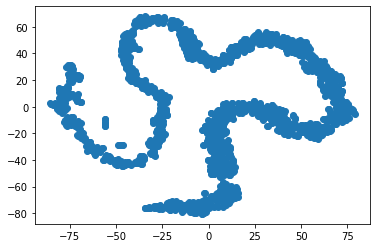

In [ ]:
#implementing the model 
model = Word2Vec(count)
X = model.wv[model.wv.key_to_index]
T_sne = TSNE(perplexity = 10)
X_tsne = T_sne.fit_transform(X)
plt.scatter(X_tsne[:,0], X_tsne[:,1])
plt.show()